(HW2_2024)=
# HW2

**Deadline:** 03.11.2024 23:59 (GMT+5).

In this task you are suggested to implement gradient descent and Newton's optimization methods, and investigate their performance for three types of functions:

* quadratic function
* loss function of linear regression
* loss function of logistic regression

`BaseSmoothOracle` is an abstract class for objective function $f$ (**oracle**). Each concrete oracle must inherit this class, implementing four methods:

* `func(x)` calculates $f(\boldsymbol x)$
* `grad(x)` calculates $\nabla f(\boldsymbol x)$
* `hess(x)` calculates $\nabla^2 f(\boldsymbol x)$
* `get_opt(x)` calculates point of minimum by direct formula (works only for quadratic and linear regression oracles)

In [1]:
class BaseSmoothOracle(object):
    """
    Base class for implementation of oracles.
    """
    def func(self, x):
        """
        Computes the value of function at point x.
        """
        raise NotImplementedError('Func oracle is not implemented.')

    def grad(self, x):
        """
        Computes the gradient at point x.
        """
        raise NotImplementedError('Grad oracle is not implemented.')
    
    def hess(self, x):
        """
        Computes the Hessian matrix at point x.
        """
        raise NotImplementedError('Hessian oracle is not implemented.')
        
    def get_opt(self):
        """
        Computes the point x at which minimum is attained
        """
        raise NotImplementedError('True solution is unavailable.')

## Quadratic oracle

### Task 2.1 (1 point)

Implement quadratic oracle

$$
    f(\boldsymbol x) = \frac 12 \boldsymbol x^\mathsf{T} \boldsymbol{Ax} - \boldsymbol b^\mathsf{T} \boldsymbol x, \quad \boldsymbol A^\mathsf{T}  = \boldsymbol A \in \mathbb R^{n\times n}, \quad \boldsymbol b\in\mathbb R^n
$$

<!-- Let $\boldsymbol A$ be a symmetric positive definite matrix. Solve the optimization task

$$
    f(\boldsymbol x) = \frac 12 \boldsymbol x^\mathsf{T} \boldsymbol{Ax} - \boldsymbol b^\mathsf{T}\boldsymbol x \to \min\limits_{\boldsymbol x \in \mathbb R^n}
$$

analytically. Namely, -->

Namely,

* find solution $\boldsymbol x_*$ of the equation $\nabla f(\boldsymbol x) = \boldsymbol 0$ 
* find hessian $\nabla^2 f$ and show that $\nabla^2 f(\boldsymbol x_*)$ is positive definite
* prove that $\boldsymbol x_*$ is the point of global minimum of $f$
* finally, fill the gaps in cell below

In [2]:

import numpy as np

class QuadraticOracle(BaseSmoothOracle):
    """
    Oracle for quadratic function:
       func(x) = 1/2 x^TAx - b^Tx.
    """

    def __init__(self, A, b):
        if not np.allclose(A, A.T):
            raise ValueError('A should be a symmetric matrix.')
        self.A = A
        self.b = b

    def func(self, x):
        return 0.5 * np.dot(x, np.dot(self.A, x)) - np.dot(self.b, x)

    def grad(self, x):
        return np.dot(self.A, x) - self.b
        
    def hess(self, x):
        return self.A
            
    def get_opt(self):
        return np.linalg.solve(self.A, self.b)
 

$$
f(\boldsymbol{x}) = \frac{1}{2} \boldsymbol{x}^\mathsf{T} \boldsymbol{A} \boldsymbol{x} - \boldsymbol{b}^\mathsf{T} \boldsymbol{x}
$$

We take partial derivatives:

For $ \frac{1}{2} \boldsymbol{x}^\mathsf{T} \boldsymbol{A} \boldsymbol{x} $  gradient is $ \boldsymbol{A} \boldsymbol{x} $.
For $ -\boldsymbol{b}^\mathsf{T} \boldsymbol{x} $  gradient is $ -\boldsymbol{b} $.

 The gradient is :

$$
\nabla f(\boldsymbol{x}) = \boldsymbol{A} \boldsymbol{x} - \boldsymbol{b}
$$

To find the point of minimum we set the gradient equal to zero

$$
\boldsymbol{A} \boldsymbol{x}_* = \boldsymbol{b}
$$

Solving the system

$$
\boldsymbol{x}_* = \boldsymbol{A}^{-1} \boldsymbol{b}
$$

The Hessian is the second derivative. Since the derivative of a linear term $ \boldsymbol{A} \boldsymbol{x} $ is simply $ \boldsymbol{A} $, then:

$$
\nabla^2 f(\boldsymbol{x}) = \boldsymbol{A}
$$

If $ \boldsymbol{A} $ — symmetric and positive definite, then:

Hessian $ \boldsymbol{A} $ positively defined.
Quadratic form $ \frac{1}{2} \boldsymbol{x}^\mathsf{T} \boldsymbol{A} \boldsymbol{x} $ is convex.

Hence, the function $ f(\boldsymbol{x}) $ has a unique global minimum at the point $ \boldsymbol{x}_* = \boldsymbol{A}^{-1} \boldsymbol{b} $.


Plot levels of the quadraric oracle in 2-dimensional case using the following function:

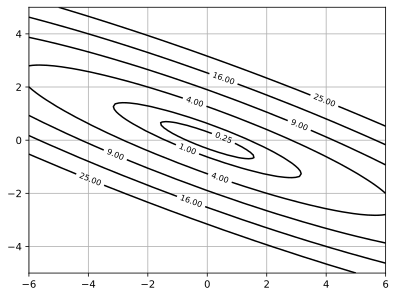

In [3]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

def plot_levels(func, xrange=None, yrange=None, levels=None):
    """
    Plotting the contour lines of the function.

    Example:
    --------
    >> oracle = QuadraticOracle(np.array([[1.0, 2.0], [2.0, 5.0]]), np.zeros(2))
    >> plot_levels(oracle.func)
    """
    if xrange is None:
        xrange = [-6, 6]
    if yrange is None:
        yrange = [-5, 5]
    if levels is None:
        levels = [0, 0.25, 1, 4, 9, 16, 25]
        
    x = np.linspace(xrange[0], xrange[1], 100)
    y = np.linspace(yrange[0], yrange[1], 100)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros(X.shape)
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            Z[i, j] = func(np.array([X[i, j], Y[i, j]]))

    CS = plt.contour(X, Y, Z, levels=levels, colors='k')
    plt.clabel(CS, inline=1, fontsize=8) 
    plt.grid()   
    
oracle = QuadraticOracle(np.array([[1.0, 2.0], [2.0, 5.0]]), np.zeros(2))
plot_levels(oracle.func)

## Linear regression oracle

### Task 2.2 (1.5 points)

Implement linear regression oracle

$$
    f(\boldsymbol x) = \frac 1m \Vert \boldsymbol{Ax} - \boldsymbol b\Vert_2^2, \quad \boldsymbol A \in \mathbb R^{m\times n}, \quad \boldsymbol b \in \mathbb R^n.
$$

Namely,

* find $\nabla f(\boldsymbol x)$
* find $\nabla^2 f(\boldsymbol x)$
* find analytic solution of the minimization problem $f(\boldsymbol x) \to \min\limits_{\boldsymbol x}$
* finally, fill the gaps in the next cell

In [4]:
class LinRegOracle(BaseSmoothOracle):
    """
    Oracle for linear regression:
       func(x) = 1/m ||Ax - b||^2.
    """

    def __init__(self, A, b):
        self.A = A
        self.b = b

    def func(self, x):
        diff = np.dot(self.A, x) - self.b
        return (1 / self.A.shape[0]) * np.dot(diff.T, diff)

    def grad(self, x):
        diff = np.dot(self.A, x) - self.b
        return (2 / self.A.shape[0]) * np.dot(self.A.T, diff)  
        
    def hess(self, x):
        return (2 / self.A.shape[0]) * np.dot(self.A.T, self.A)
    
    def get_opt(self):
        AtA_inv = np.linalg.inv(np.dot(self.A.T, self.A))
        return np.dot(AtA_inv, np.dot(self.A.T, self.b))
    


$$
f(\boldsymbol{x}) = \frac{1}{m} \Vert \boldsymbol{A} \boldsymbol{x} - \boldsymbol{b} \Vert_2^2
$$

Open brakets

$$
f(\boldsymbol{x}) = \frac{1}{m} \left( \boldsymbol{x}^\mathsf{T} \boldsymbol{A}^\mathsf{T} \boldsymbol{A} \boldsymbol{x} - 2 \boldsymbol{b}^\mathsf{T} \boldsymbol{A} \boldsymbol{x} + \boldsymbol{b}^\mathsf{T} \boldsymbol{b} \right)
$$

Taking derivative

$$
\nabla f(\boldsymbol{x}) = \frac{2}{m} \boldsymbol{A}^\mathsf{T} \left( \boldsymbol{A} \boldsymbol{x} - \boldsymbol{b} \right)
$$

Derivative from gradient to get Hessian

$$
\nabla^2 f(\boldsymbol{x}) = \frac{2}{m} \boldsymbol{A}^\mathsf{T} \boldsymbol{A}
$$
To find the point of minimum we set the gradient equal to zero

$$
\boldsymbol{A}^\mathsf{T} \left( \boldsymbol{A} \boldsymbol{x} - \boldsymbol{b} \right) = 0
$$
Solving system

$$
\boldsymbol{x}_* = \left( \boldsymbol{A}^\mathsf{T} \boldsymbol{A} \right)^{-1} \boldsymbol{A}^\mathsf{T} \boldsymbol{b}
$$


## Logistic regression oracle

### Task 2.3 (1.5 point)

Implement logistic regression oracle

$$
    f(\boldsymbol x) = \frac 1m \sum_{i=1}^m \log\big(1 + \exp(-b_i\boldsymbol a_i^\mathsf{T} \boldsymbol x)\big) + \frac C2\Vert \boldsymbol x\Vert_2^2
$$

Namely, denote

$$
    \boldsymbol A = \begin{pmatrix} a_1^\mathsf{T} \\
    a_2^\mathsf{T} \\
    \vdots\\
    a_m^\mathsf{T}
    \end{pmatrix} \in \mathbb R^{m\times n}, \quad
    \boldsymbol b = \begin{pmatrix} b_1 \\
    b_2\\
    \vdots\\
    b_m
    \end{pmatrix}\in \mathbb R^m,
    \quad
    \boldsymbol x = \begin{pmatrix} x_1 \\
    x_2\\
    \vdots\\
    x_n
    \end{pmatrix}\in \mathbb R^n,
$$

and then

* find the gradient $\nabla f(\boldsymbol x)$ and hessian $\nabla^2 f(\boldsymbol x)$ of logistic regression oracle {eq}`log-reg-oracle` in matrix-vector form
* fill the gaps in the cell below 

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from scipy.special import expit

class LogRegOracle(BaseSmoothOracle):
    """
    Oracle for logistic regression.
    """

    def __init__(self, A, b, regcoef=1):
        self.A = A
        self.b = b
        self.C = regcoef

    def func(self, x):
        m = self.A.shape[0]
        Ax_b = -self.b * np.dot(self.A, x)
        log_terms = np.log(1 + np.exp(Ax_b))
        regularization = (self.C / 2) * np.dot(x, x)
        return (1 / m) * np.sum(log_terms) + regularization

    def grad(self, x):
        m = self.A.shape[0]
        Ax_b = -self.b * np.dot(self.A, x)
        sigmoid = expit(Ax_b)
        grad_log = - (self.b * (1 - sigmoid)) @ self.A
        grad_regularization = self.C * x
        return (1 / m) * grad_log + grad_regularization

    def hess(self, x):
        m = self.A.shape[0]
        Ax_b = -self.b * np.dot(self.A, x)
        sigmoid = expit(Ax_b)
        D = sigmoid * (1 - sigmoid)
        H_log = (self.A.T * D) @ self.A
        H_regularization = self.C * np.eye(self.A.shape[1])
        return (1 / m) * H_log + H_regularization
    
    def get_opt(self):
        """
        Since there is no analytic solution for the optimal weights of logistic regression, 
        here we have to cheat a bit
        """
        LR = LogisticRegression(fit_intercept=False, C= 1./self.C/self.A.shape[0])
        LR.fit(self.A, (self.b + 1) / 2)
        return LR.coef_[0]

A formula for a single element

$$
\frac{\partial}{\partial \boldsymbol{x}} \log\left(1 + \exp(-b_i \boldsymbol{a}_i^\mathsf{T} \boldsymbol{x})\right) = \frac{-b_i \boldsymbol{a}_i}{1 + \exp(b_i \boldsymbol{a}_i^\mathsf{T} \boldsymbol{x})}
$$

Gradient of the entire loss function

$$
\nabla f_{\text{logistic}}(\boldsymbol{x}) = - \frac{1}{m} \sum_{i=1}^m \frac{b_i \boldsymbol{a}_i}{1 + \exp(b_i \boldsymbol{a}_i^\mathsf{T} \boldsymbol{x})}
$$

Translate into matrix notation

$$
\nabla f_{\text{logistic}}(\boldsymbol{x}) = - \frac{1}{m} \boldsymbol{A}^\mathsf{T} \left( \frac{\boldsymbol{b}}{1 + \exp(\boldsymbol{b} \odot (\boldsymbol{A} \boldsymbol{x}))} \right)
$$

Gradient from the regularizer $ \frac{C}{2} \Vert \boldsymbol{x} \Vert_2^2 $:

$$
\nabla f_{\text{reg}}(\boldsymbol{x}) = C \boldsymbol{x}
$$

Put the two pieces together

$$
\nabla f(\boldsymbol{x}) = - \frac{1}{m} \boldsymbol{A}^\mathsf{T} \left( \frac{\boldsymbol{b}}{1 + \exp(\boldsymbol{b} \odot (\boldsymbol{A} \boldsymbol{x}))} \right) + C \boldsymbol{x}
$$

Calculate the second derivative for one element

$$
\frac{\partial^2}{\partial \boldsymbol{x}^2} \log\left(1 + \exp(-b_i \boldsymbol{a}_i^\mathsf{T} \boldsymbol{x})\right) = \frac{b_i^2 \boldsymbol{a}_i \boldsymbol{a}_i^\mathsf{T}}{\left(1 + \exp(b_i \boldsymbol{a}_i^\mathsf{T} \boldsymbol{x})\right)^2} \exp(b_i \boldsymbol{a}_i^\mathsf{T} \boldsymbol{x})
$$

Put pieces together

$$
\nabla^2 f_{\text{logistic}}(\boldsymbol{x}) = \frac{1}{m} \sum_{i=1}^m \frac{b_i^2 \boldsymbol{a}_i \boldsymbol{a}_i^\mathsf{T}}{\left(1 + \exp(b_i \boldsymbol{a}_i^\mathsf{T} \boldsymbol{x})\right)^2} \exp(b_i \boldsymbol{a}_i^\mathsf{T} \boldsymbol{x})
$$

Hessian in matrix form

$$
\nabla^2 f_{\text{logistic}}(\boldsymbol{x}) = \frac{1}{m} \boldsymbol{A}^\mathsf{T} \boldsymbol{W} \boldsymbol{A}
$$

where $ W_{ii} = \frac{\exp(b_i \boldsymbol{a}_i^\mathsf{T} \boldsymbol{x})}{\left(1 + \exp(b_i \boldsymbol{a}_i^\mathsf{T} \boldsymbol{x})\right)^2} $.

Regularization Hessian

$$
\nabla^2 f_{\text{reg}}(\boldsymbol{x}) = C \boldsymbol{I}
$$

Total Hessian

$$
\nabla^2 f(\boldsymbol{x}) = \frac{1}{m} \boldsymbol{A}^\mathsf{T} \boldsymbol{W} \boldsymbol{A} + C \boldsymbol{I}
$$

## Gradient descent

Given a starting point $\boldsymbol x_0 \in\mathbb R^n$ and learning rate $\eta > 0$, iteratively calculate

$$
    \boldsymbol x_{k+1} = \boldsymbol x_k - \eta \nabla f(\boldsymbol x_k), \quad k = 0, 1,\ldots
$$

The process should stop when either $k = \mathrm{max\_iter}$ or 

$$
\Vert \nabla f(\boldsymbol x_k)\Vert_2^2 \leqslant \varepsilon \Vert \nabla f(\boldsymbol x_0)\Vert_2^2
$$

where $\varepsilon > 0$ is tolerance.

### Task 2.4 (1 point)

Complete the implementation of gradient descent algorithm.

In [17]:
from datetime import datetime
from collections import defaultdict

def gradient_descent(oracle, x_0, learning_rate, tolerance=1e-5, max_iter=10000,
                     trace=False, display=False):
    """
    Gradient descent optimization method.

    Parameters
    ----------
    oracle : BaseSmoothOracle-descendant object
        Oracle with .func(), .grad() and .hess() methods implemented for computing
        function value, its gradient and Hessian respectively.
    x_0 : np.array
        Starting point for optimization algorithm.
    learning_rate : float
        Learning rate.
    tolerance : float
        Epsilon value for stopping criterion.
    max_iter : int
        Maximum number of iterations.
    trace : bool
        If True, the progress information is appended into history dictionary during training.
        Otherwise None is returned instead of history.
    display : bool
        If True, debug information is displayed during optimization.
        Printing format and is up to a student and is not checked in any way.

    Returns
    -------
    x_star : np.array
        The point found by the optimization procedure
    message : string
        "success" or the description of error:
            - 'iterations_exceeded': if after max_iter iterations of the method x_k still doesn't satisfy
                the stopping criterion.
            - 'computational_error': in case of getting Infinity or None value during the computations.
    history : dictionary of lists or None
        Dictionary containing the progress information or None if trace=False.
        Dictionary has to be organized as follows:
            - history['time'] : list of floats, containing time in seconds passed from the start of the method
            - history['func'] : list of function values f(x_k) on every step of the algorithm
            - history['grad_norm'] : list of values Euclidian norms ||g(x_k)|| of the gradient on every step of the algorithm
            - history['x'] : list of np.arrays, containing the trajectory of the algorithm. ONLY STORE IF x.size <= 2

    Example:
    --------
    >> oracle = QuadraticOracle(np.eye(5), np.arange(5))
    >> x_opt, message, history = gradient_descent(oracle, np.zeros(5))
    >> print('Found optimal point: {}'.format(x_opt))
       Found optimal point: [ 0.  1.  2.  3.  4.]
    """

    history = defaultdict(list) if trace else None
    x_k = np.copy(x_0)
    grad_at_x_0 = oracle.grad(x_0)

    INF = 1e100
    start_time = datetime.now()

    for i in range(max_iter + 1):     
        grad_at_x_k = oracle.grad(x_k)
        if np.any(np.abs(x_k) > INF) or np.any(np.abs(grad_at_x_k) > INF):
            return x_k, 'computational_error', history

        if trace:
            history['time'].append((datetime.now() - start_time).total_seconds())
            history['func'].append(oracle.func(x_k))
            history['grad_norm'].append(np.linalg.norm(grad_at_x_k))
            
            # Append x_k and check its shape
            x_k_array = np.array(x_k)
            history['x'].append(x_k_array)  # Append as a numpy array

            # Debugging: Print shape of x_k and history['x']
            print(f"Iteration {i}, shape of x_k: {x_k_array.shape}, history['x'] length: {len(history['x'])}")

        if display:
            print("iteration {}: |x_k-x_0| = {}, f(x_k) = {}, |grad(f(x_k))| = {}".format(
                i, np.linalg.norm(x_k - x_0), oracle.func(x_k), np.linalg.norm(grad_at_x_k))
            )

        # Gradient Descent Update
        x_k = x_k - learning_rate * grad_at_x_k

        # Stopping criterion
        if np.linalg.norm(grad_at_x_k)**2 <= tolerance * np.linalg.norm(grad_at_x_0)**2:
            return x_k, 'success', history

    return x_k, 'iterations_exceeded', history


Now it's try to test gradient descent algorithm on different tasks. Here is some auxiliary code for visualization.

In [18]:
import colorsys

def get_color_array(size):
    HSV_tuples = [(float(i) / size, 1.0, 1.0) for i in range(size)]
    RGB_tuples = list(map(lambda x: colorsys.hsv_to_rgb(*x), HSV_tuples))
    return np.array(RGB_tuples)

def plot_2d(history, oracle, x_0, x_opt, scale, title, n_levels=3, xlims=None, ylims=None, bound=None):
    if bound is not None:
        history['x'] = history['x'][:bound]
    hist_x = np.array(history['x']).T
    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    
    plt.plot(np.linalg.norm(hist_x - x_opt[:, None], axis=0), c='c', linewidth=3)
    plt.plot(history['grad_norm'], c='m', linewidth=2)
    plt.xlim(0, len(history['grad_norm']) - 1)
    plt.ylim(0, 2)
    plt.title(title)
    plt.ylabel('Gradients/residuals norm')
    plt.xlabel('Iteration')
    plt.legend(['Residuals', 'Gradients'])
    plt.grid(ls=":")
    
    plt.subplot(122)
    if xlims is not None:
        x_range = xlims
    else:
        x_range = [x_opt[0] - scale, x_opt[0] + scale]
    if ylims is not None:
        y_range = ylims
    else:
        y_range = [x_opt[1] - scale, x_opt[1] + scale]
    func_opt = oracle.func(x_opt)
    levels = [func_opt + 0.25 * scale / n_levels * i for i in range(1, 4*n_levels + 1, 4)]
    # sizes = np.minimum(5 * float(hist_x.shape[1]) / (np.arange(1, hist_x.shape[1] + 1)), 20)
    plt.scatter(hist_x[0], hist_x[1], s=8, c=get_color_array(hist_x.shape[1]))
    plt.plot(hist_x[0], hist_x[1], alpha=0.6, ls="--", c='r')
    # plt.plot(hist_x[0], hist_x[1], c='r', linewidth=3)
    plt.scatter(x_opt[0], x_opt[1], marker='s', c='r', edgecolors='k')
    plot_levels(oracle.func, xrange=x_range, yrange=y_range, levels=levels)
    plt.title('Trajectory')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(ls=":")
    if xlims is not None:
        plt.xlim(xlims)
    if ylims is not None:
        plt.ylim(ylims)
    plt.show()

def test_2d(method, oracle, x_0, lr, tol=1e-5, scale=1.0, xlims=None, ylims=None, bound=None):
    x_opt = oracle.get_opt()
    if method == 'gd':
        x_star, msg, history = gradient_descent(
            oracle, x_0, lr, tol, trace=True
        )
    elif method == 'newton':
        x_star, msg, history = newton(
            oracle, x_0, lr, tol, trace=True
        )
    else:
        raise ValueError("Unknown error")
    print(msg, len(history['grad_norm']), "iterations")
    plot_2d(history, oracle, x_0, x_opt, scale, 'lr = {}'.format(lr), xlims=xlims, ylims=ylims, bound=bound)

Take a simple quadratic function

$$
    f(x, y) = 2x^2 + 4xy + 5 y^2
$$

which ovbiously has minimum at $(0, 0)$. Now run gradient descent method with $\eta = 0.01$, starting from point $(-2, -1)$:

Iteration 0, shape of x_k: (2,), history['x'] length: 1
Iteration 1, shape of x_k: (2,), history['x'] length: 2
Iteration 2, shape of x_k: (2,), history['x'] length: 3
Iteration 3, shape of x_k: (2,), history['x'] length: 4
Iteration 4, shape of x_k: (2,), history['x'] length: 5
Iteration 5, shape of x_k: (2,), history['x'] length: 6
Iteration 6, shape of x_k: (2,), history['x'] length: 7
Iteration 7, shape of x_k: (2,), history['x'] length: 8
Iteration 8, shape of x_k: (2,), history['x'] length: 9
Iteration 9, shape of x_k: (2,), history['x'] length: 10
Iteration 10, shape of x_k: (2,), history['x'] length: 11
Iteration 11, shape of x_k: (2,), history['x'] length: 12
Iteration 12, shape of x_k: (2,), history['x'] length: 13
Iteration 13, shape of x_k: (2,), history['x'] length: 14
Iteration 14, shape of x_k: (2,), history['x'] length: 15
Iteration 15, shape of x_k: (2,), history['x'] length: 16
Iteration 16, shape of x_k: (2,), history['x'] length: 17
Iteration 17, shape of x_k: (2,),

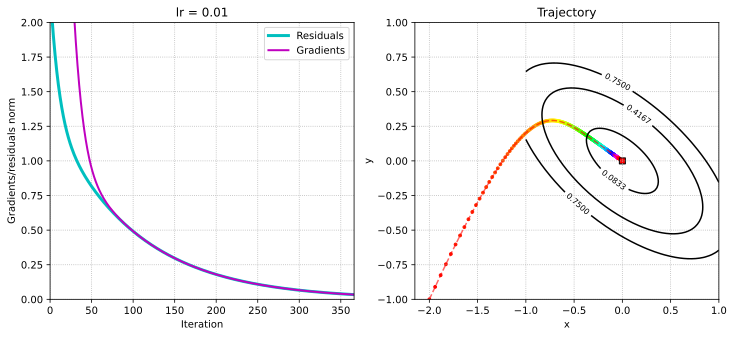

In [19]:
import numpy as np

A = np.array([[2, 2], [2, 5]])
b = np.zeros(2)
q_oracle = QuadraticOracle(A, b)
test_2d("gd", q_oracle, np.array([-2.0, -1.0]), lr=0.01)

If you did all correctly, gradient descent should converge here to optimal point. But this is not always the case:

* if $\eta$ is very small, convergence could be too slow
* if $\eta$ is very big, than gradient descent often diverges

### Task 2.5 (1 point)

Take previous quadratic oracle and try different learning rates and starting points. Find the smallest and the largest learning rates for which gradient descent is still convergent. Provide some characteristic plots. Also, plot a graph of required iterations versus $\eta$.

### GD for linear regression

Let's try it for simple linear regression. Here is a toy example:

Iteration 0, shape of x_k: (2,), history['x'] length: 1
Iteration 1, shape of x_k: (2,), history['x'] length: 2
Iteration 2, shape of x_k: (2,), history['x'] length: 3
Iteration 3, shape of x_k: (2,), history['x'] length: 4
Iteration 4, shape of x_k: (2,), history['x'] length: 5
Iteration 5, shape of x_k: (2,), history['x'] length: 6
Iteration 6, shape of x_k: (2,), history['x'] length: 7
Iteration 7, shape of x_k: (2,), history['x'] length: 8
Iteration 8, shape of x_k: (2,), history['x'] length: 9
Iteration 9, shape of x_k: (2,), history['x'] length: 10
Iteration 10, shape of x_k: (2,), history['x'] length: 11
Iteration 11, shape of x_k: (2,), history['x'] length: 12
Iteration 12, shape of x_k: (2,), history['x'] length: 13
Iteration 13, shape of x_k: (2,), history['x'] length: 14
Iteration 14, shape of x_k: (2,), history['x'] length: 15
Iteration 15, shape of x_k: (2,), history['x'] length: 16
Iteration 16, shape of x_k: (2,), history['x'] length: 17
Iteration 17, shape of x_k: (2,),

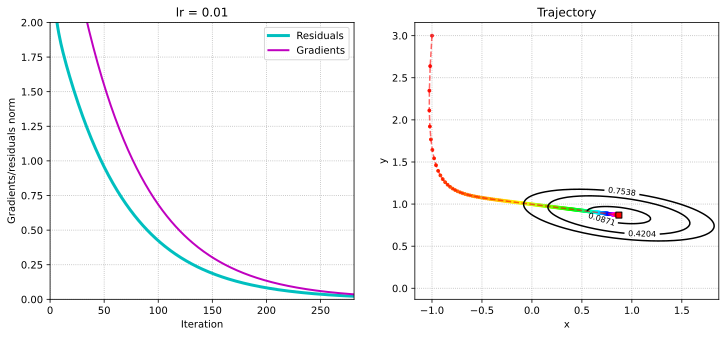

In [20]:
A = np.array([[1, -2.1], [1, 1.2], [1, 4.8]])
b = np.array([-1, 2, 5])
oracle = LinRegOracle(A, b)
test_2d("gd", oracle, np.array([-1, 3.0]), lr=0.01, tol=1e-6)

### Task 2.6 (0.5 points)

Apply gradient descent algorithm to simple linear regression trained on `boston` dataset. Take `lstat` as feature, `medv` as target. Provide some visualizations.

Iteration 0, shape of x_k: (2,), history['x'] length: 1
Iteration 1, shape of x_k: (2,), history['x'] length: 2
Iteration 2, shape of x_k: (2,), history['x'] length: 3
Iteration 3, shape of x_k: (2,), history['x'] length: 4
Iteration 4, shape of x_k: (2,), history['x'] length: 5
Iteration 5, shape of x_k: (2,), history['x'] length: 6
Iteration 6, shape of x_k: (2,), history['x'] length: 7
Iteration 7, shape of x_k: (2,), history['x'] length: 8
Iteration 8, shape of x_k: (2,), history['x'] length: 9
Iteration 9, shape of x_k: (2,), history['x'] length: 10
Iteration 10, shape of x_k: (2,), history['x'] length: 11
Iteration 11, shape of x_k: (2,), history['x'] length: 12
Iteration 12, shape of x_k: (2,), history['x'] length: 13
Iteration 13, shape of x_k: (2,), history['x'] length: 14
Iteration 14, shape of x_k: (2,), history['x'] length: 15
Iteration 15, shape of x_k: (2,), history['x'] length: 16
Iteration 16, shape of x_k: (2,), history['x'] length: 17
Iteration 17, shape of x_k: (2,),

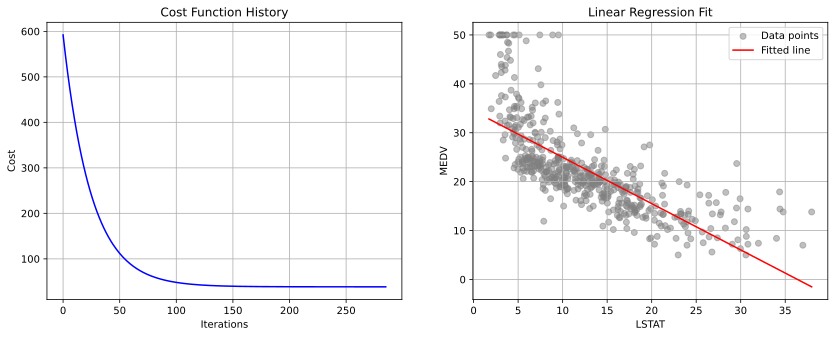

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from datetime import datetime

boston = pd.read_csv("./Boston.csv").drop("Unnamed: 0", axis=1)

X = boston[['lstat']].values 
y = boston['medv'].values     

X_mean = X.mean()
X_std = X.std()
X_normalized = (X - X_mean) / X_std

X_b = np.c_[np.ones(X_normalized.shape[0]), X_normalized]  

theta_initial = np.zeros(X_b.shape[1]) 
alpha = 0.01  
iterations = 1000  

oracle = LinRegOracle(A=X_b, b=y)

theta_final, message, history = gradient_descent(oracle=oracle, x_0=theta_initial, learning_rate=alpha, max_iter=iterations, trace=True)

cost_history = history['func']

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(range(len(cost_history)), cost_history, color='blue')
plt.title('Cost Function History')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(X, y, color='gray', alpha=0.5, label='Data points')
X_fit = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_fit_normalized = (X_fit - X_mean) / X_std
X_fit_b = np.c_[np.ones(X_fit_normalized.shape[0]), X_fit_normalized]
y_fit = X_fit_b.dot(theta_final)
plt.plot(X_fit, y_fit, color='red', label='Fitted line')
plt.title('Linear Regression Fit')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.legend()
plt.grid()

plt.show()



### GD for logistic regression

The targets must be from $\{-1, 1\}$. One more toy example:

Iteration 0, shape of x_k: (2,), history['x'] length: 1
Iteration 1, shape of x_k: (2,), history['x'] length: 2
Iteration 2, shape of x_k: (2,), history['x'] length: 3
Iteration 3, shape of x_k: (2,), history['x'] length: 4
Iteration 4, shape of x_k: (2,), history['x'] length: 5
Iteration 5, shape of x_k: (2,), history['x'] length: 6
Iteration 6, shape of x_k: (2,), history['x'] length: 7
Iteration 7, shape of x_k: (2,), history['x'] length: 8
Iteration 8, shape of x_k: (2,), history['x'] length: 9
Iteration 9, shape of x_k: (2,), history['x'] length: 10
Iteration 10, shape of x_k: (2,), history['x'] length: 11
Iteration 11, shape of x_k: (2,), history['x'] length: 12
Iteration 12, shape of x_k: (2,), history['x'] length: 13
Iteration 13, shape of x_k: (2,), history['x'] length: 14
Iteration 14, shape of x_k: (2,), history['x'] length: 15
Iteration 15, shape of x_k: (2,), history['x'] length: 16
Iteration 16, shape of x_k: (2,), history['x'] length: 17
Iteration 17, shape of x_k: (2,),

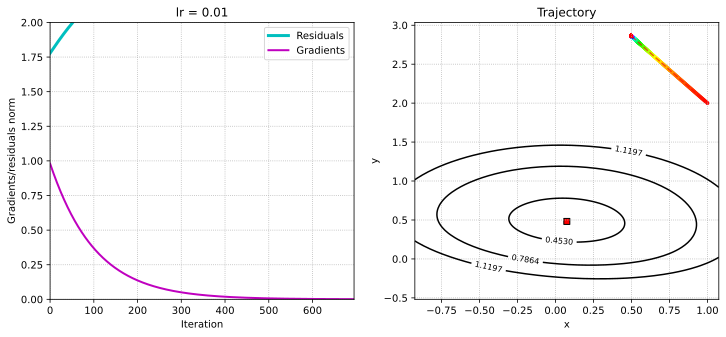

In [24]:
A = np.array([[1, -2.1], [1, 1.2], [1, 4.8], [1, 3.4]])
b = np.array([-1, 1, 1, 1])
oracle = LogRegOracle(A, b)
test_2d("gd", oracle, np.array([1., 2.0]), lr=0.01, tol=1e-6)

### Task 2.7 (0.5 points)

Train simple logistic regression model on `breast_cancer` dataset using your gradient descent method. Take any feature from the dataset. Visualize the results.

Iteration 0, shape of x_k: (1,), history['x'] length: 1
Iteration 1, shape of x_k: (1,), history['x'] length: 2
Iteration 2, shape of x_k: (1,), history['x'] length: 3
Iteration 3, shape of x_k: (1,), history['x'] length: 4
Iteration 4, shape of x_k: (1,), history['x'] length: 5
Iteration 5, shape of x_k: (1,), history['x'] length: 6
Iteration 6, shape of x_k: (1,), history['x'] length: 7
Iteration 7, shape of x_k: (1,), history['x'] length: 8
Iteration 8, shape of x_k: (1,), history['x'] length: 9
Iteration 9, shape of x_k: (1,), history['x'] length: 10
Iteration 10, shape of x_k: (1,), history['x'] length: 11
Iteration 11, shape of x_k: (1,), history['x'] length: 12
Iteration 12, shape of x_k: (1,), history['x'] length: 13
Iteration 13, shape of x_k: (1,), history['x'] length: 14
Iteration 14, shape of x_k: (1,), history['x'] length: 15
Iteration 15, shape of x_k: (1,), history['x'] length: 16
Iteration 16, shape of x_k: (1,), history['x'] length: 17
Iteration 17, shape of x_k: (1,),

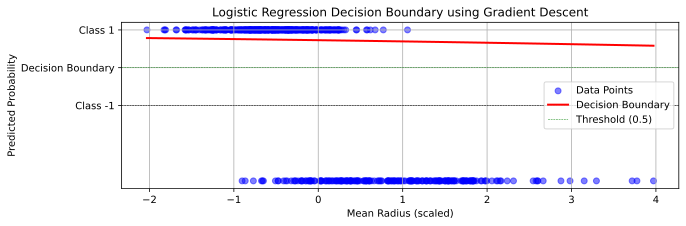

In [25]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
y = breast['target']
y[y == 0] = -1

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.special import expit

X = breast.data

feature_index = 0 
X_feature = X[:, feature_index].reshape(-1, 1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_feature)

log_reg_oracle = LogRegOracle(A=X_scaled, b=y, regcoef=1)

initial_weights = np.zeros(X_scaled.shape[1])
optimal_weights, message, history = gradient_descent(log_reg_oracle, initial_weights, learning_rate=0.1, trace=True)

print("Optimal weights:", optimal_weights)
print("Message:", message)

def plot_results(X, y, weights):
    plt.figure(figsize=(10, 3))
    
    # Scatter plot of the data points with color indicating the class
    plt.scatter(X, y, color='blue', label='Data Points', alpha=0.5)

    # Decision boundary
    x_values = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)  # 100 points in the feature range
    x_scaled = scaler.transform(x_values)  # Scale the new input points
    linear_combination = np.dot(x_scaled, weights)  # Linear combination
    decision_boundary = expit(linear_combination)  # Apply the sigmoid function

    # Plotting the probabilities for the decision boundary
    plt.plot(x_values, decision_boundary, color='red', label='Decision Boundary', linewidth=2)
    plt.axhline(0.5, color='green', linewidth=0.5, ls='--', label='Threshold (0.5)')  # Decision threshold
    plt.axhline(0, color='black', linewidth=0.5, ls='--')
    
    plt.title('Logistic Regression Decision Boundary using Gradient Descent')
    plt.xlabel('Mean Radius (scaled)')
    plt.ylabel('Predicted Probability')
    plt.yticks([0, 0.5, 1], ['Class -1', 'Decision Boundary', 'Class 1'])  # Adjust y ticks for classes
    plt.legend()
    plt.grid()
    plt.show()

# Call the plot function
plot_results(X_scaled, y, optimal_weights)


## Newton's method

Given a starting point $\boldsymbol x_0 \in\mathbb R^n$ and learning rate $\eta > 0$, iteratively calculate

$$
    \boldsymbol x_{k+1} = \boldsymbol x_k - \eta \big(\nabla^2 f(\boldsymbol x_k)\big)^{-1} \nabla f(\boldsymbol x_k), \quad k = 0, 1,\ldots
$$

The process should stop when either $k = \mathrm{max\_iter}$ or 

$$
\Vert \nabla f(\boldsymbol x_k)\Vert_2^2 \leqslant \varepsilon \Vert \nabla f(\boldsymbol x_0)\Vert_2^2
$$

where $\varepsilon > 0$ is tolerance.

### Task 2.8 (1 point)

Complete the implementation of Newton's method.

In [26]:
import scipy

def newton(oracle, x_0, learning_rate, tolerance=1e-5, max_iter=100, trace=False, display=False):
    """
    Newton's optimization method.

    Parameters
    ----------
    oracle : BaseSmoothOracle-descendant object
        Oracle with .func(), .grad() and .hess() methods implemented for computing
        function value, its gradient and Hessian respectively. If the Hessian
        returned by the oracle is not positive-definite method stops with message="newton_direction_error"
    x_0 : np.array
        Starting point for optimization algorithm
    learning_rate : float
        Learning rate.
    tolerance : float
        Epsilon value for stopping criterion.
    max_iter : int
        Maximum number of iterations.
    trace : bool
        If True, the progress information is appended into history dictionary during training.
        Otherwise None is returned instead of history.
    display : bool
        If True, debug information is displayed during optimization.

    Returns
    -------
    x_star : np.array
        The point found by the optimization procedure
    message : string
        'success' or the description of error:
            - 'iterations_exceeded': if after max_iter iterations of the method x_k still doesn't satisfy
                the stopping criterion.
            - 'newton_direction_error': in case of failure of solving linear system with Hessian matrix (e.g. non-invertible matrix).
            - 'computational_error': in case of getting Infinity or None value during the computations.
    history : dictionary of lists or None
        Dictionary containing the progress information or None if trace=False.
        Dictionary has to be organized as follows:
            - history['time'] : list of floats, containing time passed from the start of the method
            - history['func'] : list of function values f(x_k) on every step of the algorithm
            - history['grad_norm'] : list of values Euclidian norms ||g(x_k)|| of the gradient on every step of the algorithm
            - history['x'] : list of np.arrays, containing the trajectory of the algorithm. ONLY STORE IF x.size <= 2

    Example:
    --------
    >> oracle = QuadraticOracle(np.eye(5), np.arange(5))
    >> x_opt, message, history = newton(oracle, np.zeros(5), line_search_options={'method': 'Constant', 'c': 1.0})
    >> print('Found optimal point: {}'.format(x_opt))
       Found optimal point: [ 0.  1.  2.  3.  4.]
    """
    history = defaultdict(list) if trace else None
    x_k = np.copy(x_0)
    grad_at_x_0 = oracle.grad(x_0)

    INF = 1e100
    start_time = datetime.now()

    for i in range(max_iter + 1): 
        grad_at_x_k = oracle.grad(x_k)
        hess_at_x_k = oracle.hess(x_k)  

        if np.any(np.abs(x_k) > INF) or np.any(np.abs(grad_at_x_k) > INF):
            return x_k, 'computational_error', history

        if trace:
            history['time'].append((datetime.now() - start_time).seconds)
            history['func'].append(oracle.func(x_k))
            history['grad_norm'].append(np.linalg.norm(grad_at_x_k))
            if x_k.shape[0] <= 2:
                history['x'].append(np.array(x_k))

        if display:
            print("iteration {}: |x_k-x_0| = {}, f(x_k) = {}, |grad(f(x_k))| = {}".format(
                i, np.linalg.norm(x_k - x_0), oracle.func(x_k), np.linalg.norm(grad_at_x_k))
            )

        if np.linalg.norm(grad_at_x_k) ** 2 <= tolerance * np.linalg.norm(grad_at_x_0) ** 2:
            return x_k, 'success', history

        try:
            # Compute the Newton direction
            hessian_inv = np.linalg.inv(hess_at_x_k)  # Inverting the Hessian
        except np.linalg.LinAlgError:
            return x_k, 'newton_direction_error', history

        # Update the current point using Newton's method
        x_k = x_k - learning_rate * hessian_inv @ grad_at_x_k

    return x_k, 'iterations_exceeded', history

### Task 2.9 (1 point)

Apply Newton's methods to the previous tasks:

* quadratic function
* simple linear regression trained on `boston` dataset
* simple logistic regression trained on `breast_cancer` dataset

Compare the number of iterations and time execution of GD and Newton methods in this examples. Visualize your results.

Iteration 0, shape of x_k: (5,), history['x'] length: 1
Iteration 1, shape of x_k: (5,), history['x'] length: 2
Iteration 2, shape of x_k: (5,), history['x'] length: 3
Iteration 3, shape of x_k: (5,), history['x'] length: 4
Iteration 4, shape of x_k: (5,), history['x'] length: 5
Iteration 5, shape of x_k: (5,), history['x'] length: 6
Iteration 6, shape of x_k: (5,), history['x'] length: 7
Iteration 7, shape of x_k: (5,), history['x'] length: 8
Iteration 8, shape of x_k: (5,), history['x'] length: 9
Iteration 9, shape of x_k: (5,), history['x'] length: 10
Iteration 10, shape of x_k: (5,), history['x'] length: 11
Iteration 11, shape of x_k: (5,), history['x'] length: 12
Iteration 12, shape of x_k: (5,), history['x'] length: 13
Iteration 13, shape of x_k: (5,), history['x'] length: 14
Iteration 14, shape of x_k: (5,), history['x'] length: 15
Iteration 15, shape of x_k: (5,), history['x'] length: 16
Iteration 16, shape of x_k: (5,), history['x'] length: 17
Iteration 17, shape of x_k: (5,),

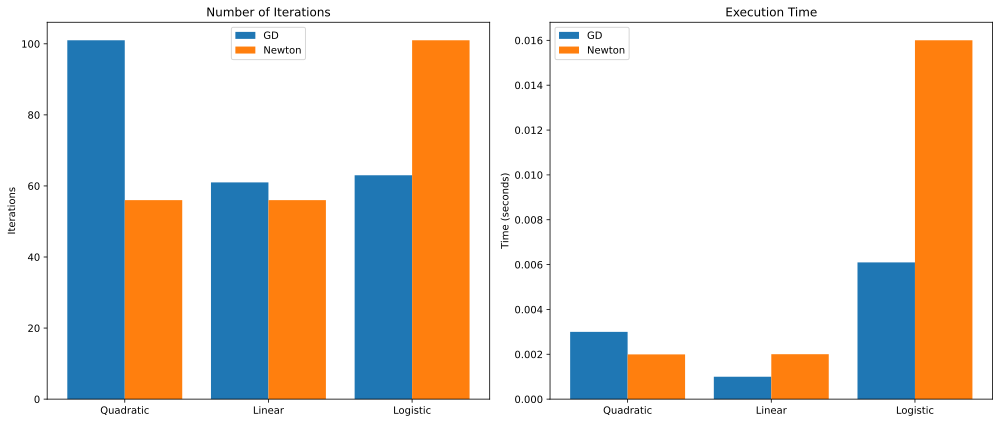

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from collections import defaultdict
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

def test(oracle, x_0, learning_rate, max_iter=100, tolerance=1e-5):
    results = {}
    
    start_time = datetime.now()
    gd_x, gd_message, gd_history = gradient_descent(oracle, x_0, learning_rate, tolerance, max_iter, trace=True)
    gd_time = (datetime.now() - start_time).total_seconds()
    
    results['GD'] = {
        'iterations': len(gd_history['func']),
        'time': gd_time
    }

    start_time = datetime.now()
    newton_x, newton_message, newton_history = newton(oracle, x_0, learning_rate, tolerance=tolerance, max_iter=max_iter, trace=True)
    newton_time = (datetime.now() - start_time).total_seconds()
    
    results['Newton'] = {
        'iterations': len(newton_history['func']),
        'time': newton_time
    }

    return results


boston = pd.read_csv("./Boston.csv").drop("Unnamed: 0", axis=1)
boston.head()
X_boston = boston[['lstat']].values 
y_boston = boston['medv'].values   

cancer = load_breast_cancer()
X_cancer = cancer.data
y_cancer = cancer.target

results = {}

A_quad = np.random.rand(5, 5)
A_quad = A_quad.T @ A_quad  
b_quad = np.random.rand(5)

quad_oracle = QuadraticOracle(A_quad, b_quad)
results['Quadratic'] = test(quad_oracle, np.random.rand(5), learning_rate=0.1)

lin_oracle = LinRegOracle(X_boston, y_boston)
results['Linear'] = test(lin_oracle, np.zeros(X_boston.shape[1]), learning_rate=0.1)

log_oracle = LogRegOracle(X_cancer, y_cancer)
results['Logistic'] = test(log_oracle, np.zeros(X_cancer.shape[1]), learning_rate=0.1)

def plot_results(results):
    methods = ['GD', 'Newton']
    iterations = {method: [] for method in methods}
    times = {method: [] for method in methods}
    
    for task in results:
        for method in methods:
            iterations[method].append(results[task][method]['iterations'])
            times[method].append(results[task][method]['time'])
    
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 2, 1)
    plt.bar(np.arange(len(results)) - 0.2, iterations['GD'], width=0.4, label='GD')
    plt.bar(np.arange(len(results)) + 0.2, iterations['Newton'], width=0.4, label='Newton')
    plt.xticks(np.arange(len(results)), results.keys())
    plt.ylabel('Iterations')
    plt.title('Number of Iterations')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.bar(np.arange(len(results)) - 0.2, times['GD'], width=0.4, label='GD')
    plt.bar(np.arange(len(results)) + 0.2, times['Newton'], width=0.4, label='Newton')
    plt.xticks(np.arange(len(results)), results.keys())
    plt.ylabel('Time (seconds)')
    plt.title('Execution Time')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

plot_results(results)


## GD vs Newton

### Task 2.10 (1 point)

Run both gradient descent and Newton's methods on **full** `boston` and `breast_cancer` datasets. Do they converge? How many iterations are required for convergence? How much time? Justify your answers by numeric experiments and visualizations.

Iteration 0, shape of x_k: (1,), history['x'] length: 1
Iteration 1, shape of x_k: (1,), history['x'] length: 2
Iteration 2, shape of x_k: (1,), history['x'] length: 3
Iteration 3, shape of x_k: (1,), history['x'] length: 4
Iteration 4, shape of x_k: (1,), history['x'] length: 5
Iteration 5, shape of x_k: (1,), history['x'] length: 6
Iteration 6, shape of x_k: (1,), history['x'] length: 7
Iteration 7, shape of x_k: (1,), history['x'] length: 8
Iteration 8, shape of x_k: (1,), history['x'] length: 9
Iteration 9, shape of x_k: (1,), history['x'] length: 10
Iteration 10, shape of x_k: (1,), history['x'] length: 11
Iteration 11, shape of x_k: (1,), history['x'] length: 12
Iteration 12, shape of x_k: (1,), history['x'] length: 13
Iteration 13, shape of x_k: (1,), history['x'] length: 14
Iteration 14, shape of x_k: (1,), history['x'] length: 15
Iteration 15, shape of x_k: (1,), history['x'] length: 16
Iteration 16, shape of x_k: (1,), history['x'] length: 17
Iteration 17, shape of x_k: (1,),

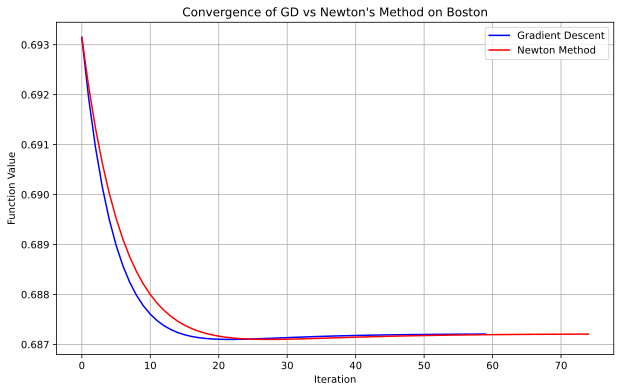

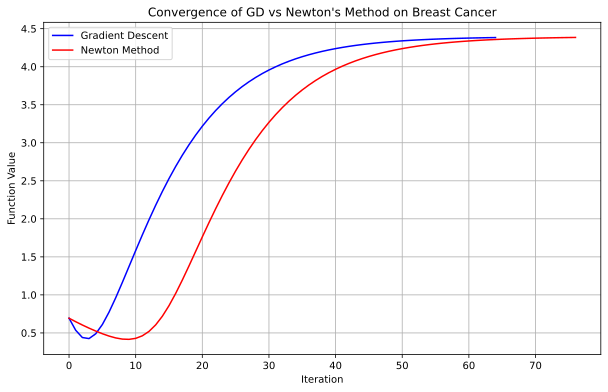

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from scipy.special import expit
from time import time
from collections import defaultdict
from datetime import datetime


boston = pd.read_csv("./Boston.csv").drop("Unnamed: 0", axis=1)
X_boston = boston[['lstat']].values
y_boston = (boston['medv'].values > 25).astype(int)

breast = load_breast_cancer()
X_breast = breast.data
y_breast = breast.target
y_breast[y_breast == 0] = -1  

scaler_boston = StandardScaler()
X_boston_scaled = scaler_boston.fit_transform(X_boston)

scaler_breast = StandardScaler()
X_breast_scaled = scaler_breast.fit_transform(X_breast)

initial_weights_boston = np.zeros(X_boston_scaled.shape[1])
initial_weights_breast = np.zeros(X_breast_scaled.shape[1])

results = {}

# Boston Dataset
oracle_boston = LogRegOracle(A=X_boston_scaled, b=y_boston)

# Градиентный спуск для Boston
start_time = time()
gd_boston_optimal_weights, grad_message_b, grad_history_b = gradient_descent(oracle_boston, initial_weights_boston, learning_rate=0.1, trace=True)
gd_boston_time = time() - start_time

# Метод Ньютона для Boston
start_time = time()
newton_boston_optimal_weights, newton_message_b, newton_history_b = newton(oracle_boston, initial_weights_boston, learning_rate=0.1, trace=True)
newton_boston_time = time() - start_time

results['Boston'] = {
    'GD': {
        'iterations': len(grad_history_b['func']),
        'time': gd_boston_time,
        'optimal_weights': gd_boston_optimal_weights,
    },
    'Newton': {
        'iterations': len(newton_history_b['func']),
        'time': newton_boston_time,
        'optimal_weights': newton_boston_optimal_weights,
    }
}

# Breast Cancer Dataset
oracle_breast = LogRegOracle(A=X_breast_scaled, b=y_breast)

# Градиентный спуск для Breast Cancer
start_time = time()
gd_breast_optimal_weights, gd_message_c, gd_history_c = gradient_descent(oracle_breast, initial_weights_breast, learning_rate=0.1, trace=True)
gd_breast_time = time() - start_time

# Метод Ньютона для Breast Cancer
start_time = time()
newton_breast_optimal_weights, newton_message_c, newton_history_c = newton(oracle_breast, initial_weights_breast, learning_rate=0.1, trace=True)
newton_breast_time = time() - start_time

results['Breast Cancer'] = {
    'GD': {
        'iterations': len(gd_history_c['func']),
        'time': gd_breast_time,
        'optimal_weights': gd_breast_optimal_weights,
    },
    'Newton': {
        'iterations': len(newton_history_c['func']),
        'time': newton_breast_time,
        'optimal_weights': newton_breast_optimal_weights,
    }
}

# Вывод результатов
for dataset, metrics in results.items():
    print(f"Results for {dataset} Dataset:")
    for method, values in metrics.items():
        print(f"{method}: Iterations: {values['iterations']}, Time: {values['time']:.4f} seconds")
    print("\n")

# Функция для построения графиков сходимости
def plot_convergence(history_gd, history_newton, oracle, dataset_name):
    plt.figure(figsize=(10, 6))
    plt.plot(history_gd['func'], label='Gradient Descent', color='blue')
    plt.plot(range(len(history_newton['func'])), history_newton['func'], label='Newton Method', color='red')
    plt.title(f'Convergence of GD vs Newton\'s Method on {dataset_name}')
    plt.xlabel('Iteration')
    plt.ylabel('Function Value')
    plt.legend()
    plt.grid()
    plt.show()

# Построение графиков сходимости для обоих наборов данных
plot_convergence(grad_history_b, newton_history_b, oracle_boston, 'Boston')
plot_convergence(gd_history_c, newton_history_c, oracle_breast, 'Breast Cancer')



Results for Boston Dataset:
GD: Iterations: 60, Time: 0.0070 seconds
Newton: Iterations: 75, Time: 0.0070 seconds

Results for Breast Cancer Dataset:
GD: Iterations: 65, Time: 0.0060 seconds
Newton: Iterations: 77, Time: 0.0143 seconds 

At boston data set they converge after 50 iterations , and after 0.0065 seconds both algorithms processed at same time , at breast dataset they converge after 60 iterations , gradient decent was 2 times effective than newtons method 